In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) {
       ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:164:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
        const double tfin = configFile.get<double>("tfin");
                                       ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
  return out;
         ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
  if ( val != configMap.end() ) {
  ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/ConfigFile.tpp:66:8: note: initialize the variable 'out' to silence this warning
  T out;
       ^
        = 0.0
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) 

In [3]:
config_name = 'bassindefault'
conf = load_conf(config_name)

g = 9.81

In [4]:
tfin = (conf['xR']-conf['xL']) * 4 / np.sqrt(conf['h00']*g)

dataset = run_with_params(
    config_name,
    gen_variations({
        'CFL': [0.5, 1, 1.01, 1.5],
        'tfin': [tfin]
    })
)

Running simulations... Done 4/4


[ConfigFile] Ligne sans '=' : "[ConfigFile] Ligne sans '=' : "# Physique :# Physique :""[ConfigFile] Ligne sans '=' : "

# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"


# Stabilité? stabilitéééé! (right)

In [5]:
def show_afewseconds(datass, index):
    params, x, v, f, _ = datass
    index_2s = np.argmin(np.abs(f[:,0]-1.15))
    plt.plot(x, f[index_2s,1:], 'x-', markersize=5)
    plt.xlabel(r'$x$ [m]')
    plt.ylabel(r'$y$ [m]')
    plt.ylim(-2.5, 2.5)
    plt.grid()
    plt.show()
    plt.savefig(export_path + 'bassin_default_CFL'+str(params['CFL'])+'_1.15s.pdf')
    return

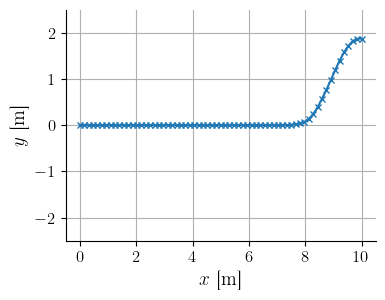

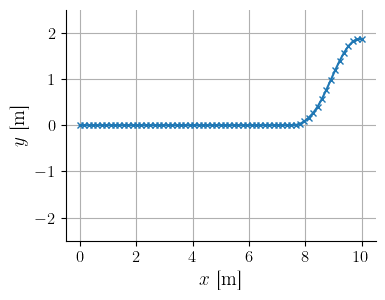

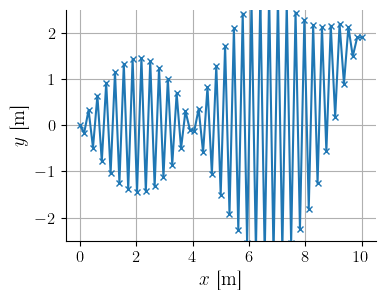

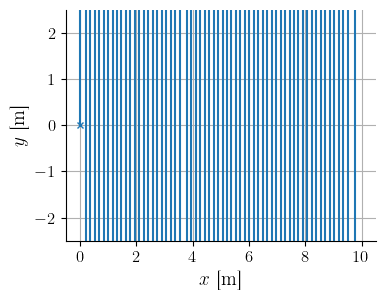

<Figure size 400x300 with 0 Axes>

In [6]:
%matplotlib inline

for i in range(4):
    show_afewseconds(datass = dataset[i], index=i)



In [7]:
import matplotlib.animation as mpla

%matplotlib qt

# 0 for slow, 1 for normal, 2 for destroyed, 3 for nuked
selected = 3

params, x, v, f, _ = dataset[selected]

plt.figure(figsize=(8, 8))

line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
size = f.shape[0]

def animate(i) -> Any:
    idx = i % size
    line.set_data(x, f[idx,1:])

anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.ylim(-2, 2)
plt.grid()

# Plots!

In [8]:
# def plot_color(datass, name):
#     params, x, v, f, h0 = datass
#     t = f[:,0]
#     h = f[:,1:]
#     X, Y = np.meshgrid(x, t)
#     plt.contourf(X, Y, h, levels=20, cmap=plt.get_cmap('viridis'))
#     plt.colorbar().set_label(r'$f(x,t)$ [m]')
#     plt.xlabel(r'$x$ [m]')
#     plt.ylabel(r'$t$ [s]')
    
#     plt.savefig(export_path + 'bassin_default_'+name+'.png')

In [9]:
# %matplotlib inline

# plot_color(datass=dataset[0], name='left')

# params, x, v, f, h0 = dataset[0]
# t = f[:,0]
# h = f[:,1:]
# X, Y = np.meshgrid(x, t)
# plt.contourf(X, Y, h, levels=20, cmap=plt.get_cmap('viridis'))
# plt.colorbar()
# plt.xlabel(r'$x$ [m]')
# plt.ylabel(r'$t$ [s]')